In [62]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [63]:
X = data.drop(columns=['target']).values
y = data.target.values

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

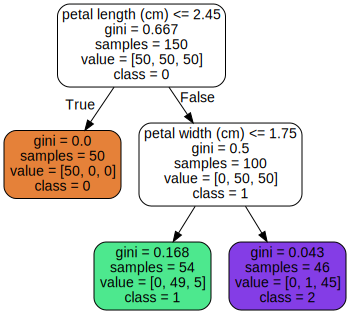

In [17]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot", 
                feature_names=data.drop(columns=['target']).columns,
                class_names=['0','1','2'], 
                rounded=True, filled=True)

# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [24]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "gini_dt.png")

In [34]:
Image(url= "gini_dt2.png")

In [32]:
# Calculate gini of root node
1 - (50/150)**2 - (50/150)**2 - (50/150)**2

0.6666666666666665

In [31]:
# Calcultate gini green leaf
1 - 0**2 - (49/54)**2 - (5/54)**2

0.1680384087791495

In [33]:
Image(url= "weighted_gini.png")

In [35]:
print(tree_clf.predict([[4,1]]))

[1.]


In [36]:
print(tree_clf.predict_proba([[4,1]]))

[[0.         0.90740741 0.09259259]]


In [52]:
print(tree_clf.predict_proba([[2,1]]))

[[1. 0. 0.]]


<AxesSubplot:>

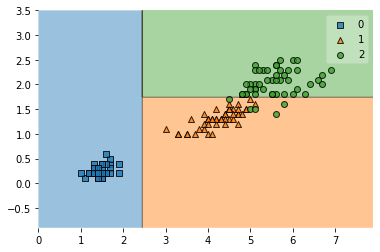

In [64]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype(np.int_), tree_clf)

In [53]:
import pandas as pd
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/flats.csv')
data.head(3)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0


In [54]:
X = data[['bedrooms','surface','floors']]
y = data['price']

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

# Custom method
plot_histogram_cv_results(cv_results)

NameError: name 'plot_histogram_cv_results' is not defined

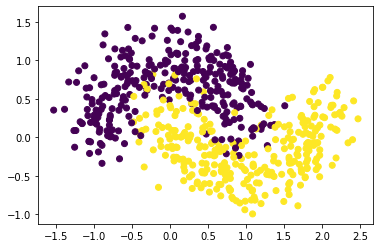

In [56]:
from sklearn.datasets import make_moons

n=600
X_moon,y_moon = make_moons(n_samples=n, noise=0.25, random_state=0)

plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)

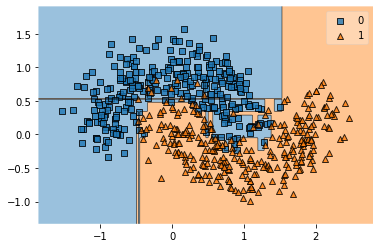

In [69]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact

#@interact(max_depth=10)
def plot_classifier(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, clf, zoom_factor=3.0)

plot_classifier(max_depth=10)

In [70]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)

plot_histogram_cv_results(cv_results)

NameError: name 'plot_histogram_cv_results' is not defined

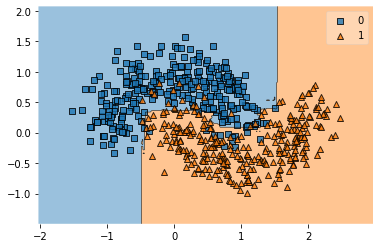

In [93]:
from sklearn.ensemble import RandomForestClassifier

#@interact(max_depth=5)
def plot_classifier(max_depth):
    cls = RandomForestClassifier(max_depth=max_depth)
    cls.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, cls, zoom_factor=2.0)

plot_classifier(max_depth=5)

<AxesSubplot:>

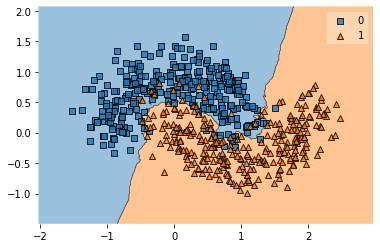

In [95]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier

weak_learner = KNeighborsClassifier(n_neighbors=3)
bagged_model = BaggingClassifier(weak_learner, n_estimators=40)

bagged_model.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, bagged_model, zoom_factor=2.0)

In [89]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

bagged_model = BaggingRegressor(linear_model,
                                n_estimators=50,
                                oob_score=True)

bagged_model.fit(X, y).oob_score_

0.9233828247764769

In [76]:
RandomForestClassifier(n_estimators=100)
BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)  # similar (but slightly less optimized)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [79]:
BaggingRegressor(RandomForestClassifier(), n_estimators=100)

BaggingRegressor(base_estimator=RandomForestClassifier(), n_estimators=100)

In [85]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)

cv_results = cross_validate(adaboost, X, y, scoring = "r2", cv=5)

cv_results

{'fit_time': array([0.0058341 , 0.00506926, 0.00223684, 0.00347376, 0.00490904]),
 'score_time': array([0.00079679, 0.00064707, 0.00055814, 0.00055814, 0.00078583]),
 'test_score': array([1.  , 1.  , 0.  , 0.85, 0.  ])}

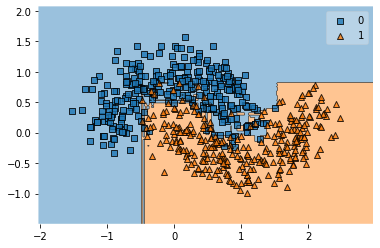

In [94]:
from sklearn.ensemble import AdaBoostClassifier

#@interact(n_estimators=[10, 30, 50,100], max_depth=3)
def plot_classifier(n_estimators, max_depth):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                               n_estimators=n_estimators)    
    model.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, model, zoom_factor=2.0)
    
plot_classifier(n_estimators=50, max_depth=3)

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

In [101]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_reg.fit(X_train, y_train,
    # evaluate loss at each iteration
    eval_set=[(X_train, y_train), (X_val, y_val)],  
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=5
)

y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.45400	validation_1-rmse:0.45400
[1]	validation_0-rmse:0.41281	validation_1-rmse:0.41281
[2]	validation_0-rmse:0.37584	validation_1-rmse:0.37584
[3]	validation_0-rmse:0.34224	validation_1-rmse:0.34224
[4]	validation_0-rmse:0.31139	validation_1-rmse:0.31139
[5]	validation_0-rmse:0.28365	validation_1-rmse:0.28365
[6]	validation_0-rmse:0.25881	validation_1-rmse:0.25881
[7]	validation_0-rmse:0.23645	validation_1-rmse:0.23645
[8]	validation_0-rmse:0.21639	validation_1-rmse:0.21639
[9]	validation_0-rmse:0.19849	validation_1-rmse:0.19849
[10]	validation_0-rmse:0.18216	validation_1-rmse:0.18216
[11]	validation_0-rmse:0.16669	validation_1-rmse:0.16669
[12]	validation_0-rmse:0.15343	validation_1-rmse:0.15343
[13]	validation_0-rmse:0.14082	validation_1-rmse:0.14082
[14]	validation_0-rmse:0.12944	validation_1-rmse:0.12944
[15]	validation_0-rmse:0.11969	validation_1-rmse:0.11969
[16]	validation_0-rmse:0.11040	validation_1-rmse:0.11040
[17]	validation_0-rmse:0.10255	validation

/Users/jinruwu/Projects/le_wagon_lectures/lewagon/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[46]	validation_0-rmse:0.02493	validation_1-rmse:0.02493
[47]	validation_0-rmse:0.02432	validation_1-rmse:0.02432
[48]	validation_0-rmse:0.02351	validation_1-rmse:0.02351
[49]	validation_0-rmse:0.02287	validation_1-rmse:0.02287
[50]	validation_0-rmse:0.02231	validation_1-rmse:0.02231
[51]	validation_0-rmse:0.02167	validation_1-rmse:0.02167
[52]	validation_0-rmse:0.02112	validation_1-rmse:0.02112
[53]	validation_0-rmse:0.02067	validation_1-rmse:0.02067
[54]	validation_0-rmse:0.02029	validation_1-rmse:0.02029
[55]	validation_0-rmse:0.01989	validation_1-rmse:0.01989
[56]	validation_0-rmse:0.01934	validation_1-rmse:0.01934
[57]	validation_0-rmse:0.01897	validation_1-rmse:0.01897
[58]	validation_0-rmse:0.01836	validation_1-rmse:0.01836
[59]	validation_0-rmse:0.01805	validation_1-rmse:0.01805
[60]	validation_0-rmse:0.01775	validation_1-rmse:0.01775
[61]	validation_0-rmse:0.01748	validation_1-rmse:0.01748
[62]	validation_0-rmse:0.01720	validation_1-rmse:0.01720
[63]	validation_0-rmse:0.01686	

In [102]:
from sklearn.pipeline import make_pipeline

pipe_xgb = make_pipeline(xgb_reg)
cv_results = cross_validate(pipe_xgb,X,y,cv=10,scoring='r2')

In [103]:
cv_results

{'fit_time': array([0.14103341, 0.13402605, 0.11808181, 0.13353491, 0.12530518,
        0.10944605, 0.12974596, 0.14215708, 0.13562799, 0.12938881]),
 'score_time': array([0.00143266, 0.00124788, 0.00120497, 0.00121593, 0.00121379,
        0.00127816, 0.00125289, 0.00152826, 0.00120521, 0.0013411 ]),
 'test_score': array([0.        , 0.        , 0.        , 0.99759773, 0.        ,
        0.        , 0.99999988, 0.        , 0.        , 0.        ])}

<AxesSubplot:>

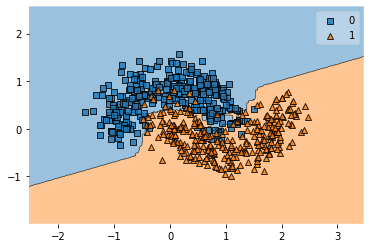

In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier()
logreg = LogisticRegression()

ensemble = VotingClassifier(
    estimators = [("rf", forest),("lr", logreg)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, ensemble)

<AxesSubplot:>

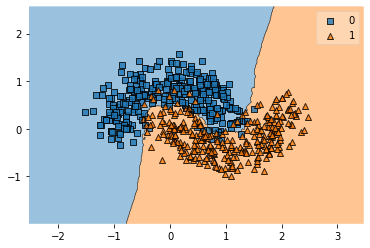

In [83]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

ensemble = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression())

ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, ensemble)